In [26]:
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import math


# 1)misure 0°

In [27]:
df = pd.read_csv('Raw_Data.csv')
df.head()

,Time (s),Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Absolute acceleration (m/s^2)
0,0.000000,0.034129,0.066162,9.855505,9.855787
1,0.009998,0.035327,0.072150,9.860146,9.860473
2,0.019996,0.040266,0.067061,9.855805,9.856115
3,0.029994,0.048050,0.067061,9.861493,9.861838
4,0.039991,0.045954,0.073497,9.871073,9.871454


In [28]:
df.count()

Time (s)                         10004
Acceleration x (m/s^2)           10004
Acceleration y (m/s^2)           10004
Acceleration z (m/s^2)           10004
Absolute acceleration (m/s^2)    10004
dtype: int64

<Figure size 432x288 with 0 Axes>

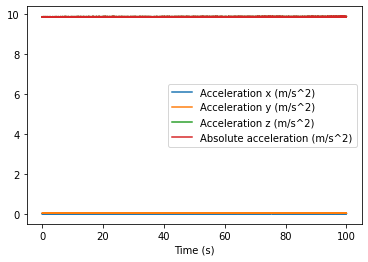

In [29]:
plt.figure()
df.plot(x='Time (s)')

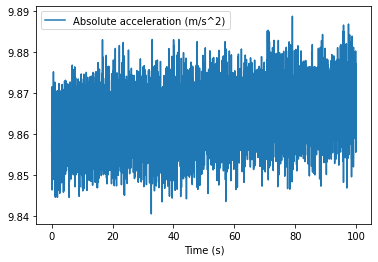

In [30]:
df.plot(x='Time (s)',y='Absolute acceleration (m/s^2)')

In [31]:
df.mean()

Time (s)                         49.997120
Acceleration x (m/s^2)            0.042584
Acceleration y (m/s^2)            0.068686
Acceleration z (m/s^2)            9.863514
Absolute acceleration (m/s^2)     9.863847
dtype: float64

In [32]:
a=1
b=1000
df[a:b].std()

Time (s)                         2.884560
Acceleration x (m/s^2)           0.004114
Acceleration y (m/s^2)           0.004909
Acceleration z (m/s^2)           0.005722
Absolute acceleration (m/s^2)    0.005723
dtype: float64

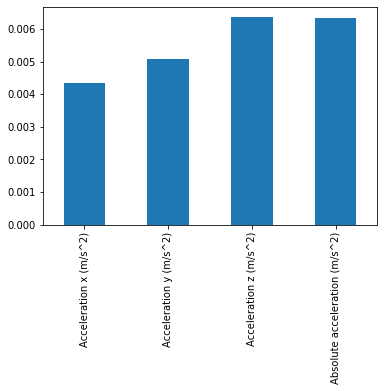

In [33]:
df[['Acceleration x (m/s^2)',
    'Acceleration y (m/s^2)',
    'Acceleration z (m/s^2)',
    'Absolute acceleration (m/s^2)']].std().plot(kind='bar')

mu=9.863847198847962, sigma=0.006359582733618131, n=10004


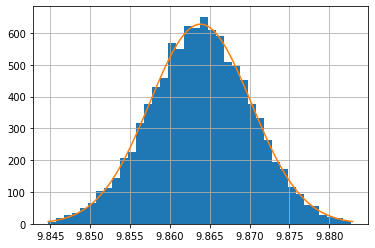

In [51]:
col4='Absolute acceleration (m/s^2)'
mu=df[col4].mean()
sigma=df[col4].std()
n=df[col4].count()
print('mu={0}, sigma={1}, n={2}'.format(mu,sigma,n))
x=np.linspace(mu - 3*sigma, mu + 3*sigma,100)

binw=0.0010
norm=n*binw
f_gauss = norm*stats.norm.pdf(x,mu,sigma)
df[col4].hist(bins=np.arange(mu - 3*sigma, mu + 3*sigma,binw))
plt.plot(x,f_gauss)

In [35]:
dati= df.T.to_numpy()

In [36]:
dati

array([[0.00000000e+00, 9.99800001e-03, 1.99960000e-02, ...,
        9.99721445e+01, 9.99821405e+01, 9.99921355e+01],
       [3.41290283e-02, 3.53265381e-02, 4.02662659e-02, ...,
        3.74221802e-02, 3.99668884e-02, 4.67028809e-02],
       [6.61624146e-02, 7.21499634e-02, 6.70605469e-02, ...,
        7.08027649e-02, 6.88568115e-02, 6.00251770e-02],
       [9.85550537e+00, 9.86014572e+00, 9.85580475e+00, ...,
        9.86807922e+00, 9.86613327e+00, 9.87286926e+00],
       [9.85578654e+00, 9.86047297e+00, 9.85611514e+00, ...,
        9.86840418e+00, 9.86645450e+00, 9.87316219e+00]])

In [37]:
dati.shape

(5, 10004)

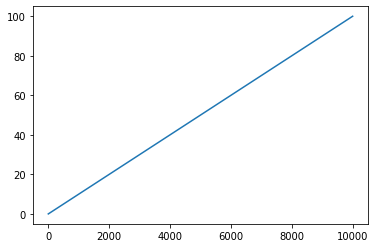

In [38]:
plt.plot(dati[0])

In [39]:
az=dati[3]
az

array([9.85550537, 9.86014572, 9.85580475, ..., 9.86807922, 9.86613327,
       9.87286926])

In [40]:
len(az[:-4])

10000

In [41]:
az100=np.asarray(np.array_split(az[:-4],100))
az100.shape

(100, 100)

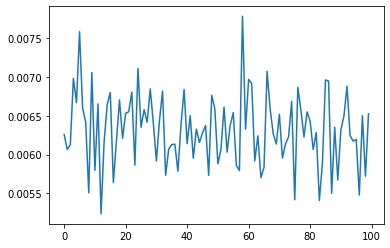

In [42]:
#deviazione standars per l'array riga 0
stdz=np.std(az100,axis=0)
plt.plot(stdz,'-')

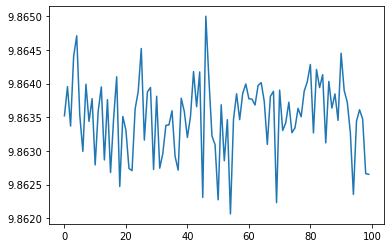

In [43]:
muz=np.mean(az100,axis=0)
plt.plot(muz,'-')

In [44]:
test=[az[0:10],
     az[11:31],
     az[32:72],
     az[73:153],
     az[154:394],
     az[395:1000],
     az[1001:2001],
     az[2002:4002],
    az[4003:40000],]

In [45]:
test=np.asarray(test)

In [46]:
test.shape

(9,)

In [47]:
length_checker=np.vectorize(len)

In [48]:
n=length_checker(test)
print(n)

[  10   20   40   80  240  605 1000 2000 6001]


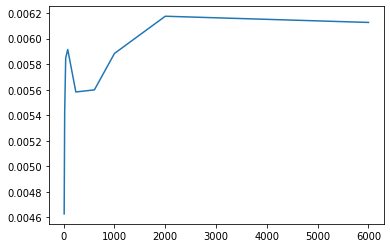

In [49]:
vstd=np.vectorize(np.std)
stdt=vstd(test)
stdtMean=stdt/np.sqrt(n)
plt.plot(n,stdt)


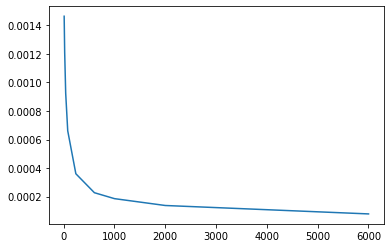

In [50]:
plt.plot(n,stdtMean)

# 2)misure 30°

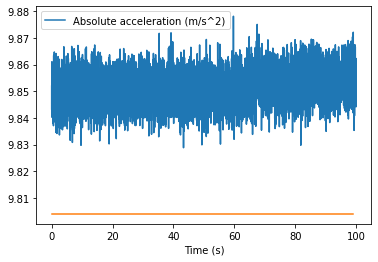

In [23]:
dl = pd.read_csv('Raw_Data2.csv')
dl.plot(x='Time (s)',y='Absolute acceleration (m/s^2)')
y=0*x+9.804
plt.plot(y,'-')

In [24]:
dl.head()

,Time (s),Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Absolute acceleration (m/s^2)
0,0.000000,0.101339,4.685856,8.665630,9.851936
1,0.009998,0.099094,4.687203,8.654852,9.843077
2,0.019996,0.105231,4.680766,8.667276,9.851006
3,0.029994,0.099842,4.686904,8.669522,9.855843
4,0.039992,0.109872,4.686604,8.663235,9.850277


mu= 27.894002822330965
sigma= 0.08016598660776031


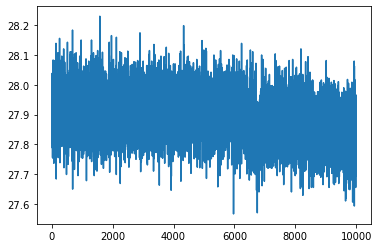

In [25]:
dati= dl.T.to_numpy()
tetha=np.arccos(dati[3]/9.804)
tetha=tetha*180/(3.14159265)
mut=tetha.mean()
sigmat=tetha.std()
N=dl.count()
plt.plot(tetha,'-')
print('mu=',mut)
print('sigma=',sigmat)